In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [6]:
#df.info()
#plt.figure(figsize=(15,5))
#df.corr()['benign_0__mal_1'].sort_values()[:-1].plot(kind='bar')


In [4]:
#sns.heatmap(df.corr())

In [5]:
#df.corr()['benign_0__mal_1'].plot(kind='barh',figsize=(10,10),title='correlation of benign_0__mal_1 ',xlabel='features',ylabel='relations')

In [30]:
x = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [31]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
X_train.shape

(455, 30)

In [60]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [61]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)

In [62]:
'''model.fit(x=X_train,y=y_train,epochs=600,
          validation_data=(X_test, y_test),verbose=1
         callbacks=[early_stop])'''

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 455 samples, validate on 114 samples
Epoch 1/600
455/455 [==============================] - 1s 2ms/step - loss: 0.6972 - val_loss: 0.6690
Epoch 2/600
455/455 [==============================] - 0s 131us/step - loss: 0.6632 - val_loss: 0.6436
Epoch 3/600
455/455 [==============================] - 0s 117us/step - loss: 0.6549 - val_loss: 0.6182
Epoch 4/600
455/455 [==============================] - 0s 108us/step - loss: 0.6331 - val_loss: 0.5865
Epoch 5/600
455/455 [==============================] - 0s 108us/step - loss: 0.6080 - val_loss: 0.5580
Epoch 6/600
455/455 [==============================] - 0s 105us/step - loss: 0.5879 - val_loss: 0.5313
Epoch 7/600
455/455 [==============================] - 0s 112us/step - loss: 0.5623 - val_loss: 0.4972
Epoch 8/600
455/455 [==============================] - 0s 116us/step - loss: 0.5376 - val_loss: 0.4617
Epoch 9/600
455/455 [==============================] - 0s 123us/step - loss: 0.4961 - val_loss: 0.4258
Epoch 10/600
455/455 [=======

455/455 [==============================] - 0s 107us/step - loss: 0.1060 - val_loss: 0.0675
Epoch 80/600
455/455 [==============================] - 0s 110us/step - loss: 0.1092 - val_loss: 0.0626
Epoch 81/600
455/455 [==============================] - 0s 108us/step - loss: 0.1116 - val_loss: 0.0622
Epoch 82/600
455/455 [==============================] - 0s 103us/step - loss: 0.1213 - val_loss: 0.0619
Epoch 83/600
455/455 [==============================] - 0s 101us/step - loss: 0.1045 - val_loss: 0.0641
Epoch 84/600
455/455 [==============================] - 0s 99us/step - loss: 0.1083 - val_loss: 0.0653
Epoch 85/600
455/455 [==============================] - 0s 105us/step - loss: 0.0864 - val_loss: 0.0653
Epoch 86/600
455/455 [==============================] - 0s 108us/step - loss: 0.1133 - val_loss: 0.0654
Epoch 87/600
455/455 [==============================] - 0s 103us/step - loss: 0.0898 - val_loss: 0.0649
Epoch 88/600
455/455 [==============================] - 0s 105us/step - loss: 

455/455 [==============================] - 0s 125us/step - loss: 0.0632 - val_loss: 0.0576
Epoch 158/600
455/455 [==============================] - 0s 108us/step - loss: 0.0627 - val_loss: 0.0554
Epoch 159/600
455/455 [==============================] - 0s 100us/step - loss: 0.0560 - val_loss: 0.0487
Epoch 160/600
455/455 [==============================] - 0s 99us/step - loss: 0.0685 - val_loss: 0.0513
Epoch 161/600
455/455 [==============================] - 0s 105us/step - loss: 0.0578 - val_loss: 0.0544
Epoch 162/600
455/455 [==============================] - 0s 105us/step - loss: 0.0562 - val_loss: 0.0563
Epoch 163/600
455/455 [==============================] - 0s 105us/step - loss: 0.0573 - val_loss: 0.0596
Epoch 164/600
455/455 [==============================] - 0s 105us/step - loss: 0.0589 - val_loss: 0.0590
Epoch 165/600
455/455 [==============================] - 0s 103us/step - loss: 0.0604 - val_loss: 0.0565
Epoch 166/600
455/455 [==============================] - 0s 105us/step

In [63]:
losses = pd.DataFrame(model.history.history)

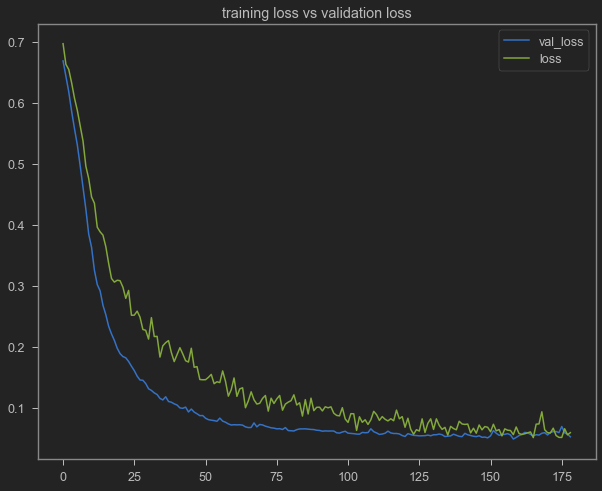

In [64]:
losses.plot(figsize=(10,8),title='training loss vs validation loss')

In [65]:
from sklearn.metrics import confusion_matrix,classification_report

In [66]:
predictions = model.predict_classes(X_test)

In [67]:
print(confusion_matrix(y_test,predictions))

[[42  1]
 [ 0 71]]


In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [69]:
from tensorflow.keras.models import load_model
model.save('Brest_cancer_model.h5')

In [75]:
new =df.head(1).drop('benign_0__mal_1',axis=1)
result = df['benign_0__mal_1'].head(1)

In [74]:
new

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [76]:
result

0    0
Name: benign_0__mal_1, dtype: int64

In [77]:
model.predict(new)

array([[0.]], dtype=float32)